In [26]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
#Deep learning kütüphaneleri
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD, RMSprop

In [28]:
#Dosya Yolu
base_path = "C:/Users/elifo/Desktop/samsung_innovation_campus/emotion_detection/"
folder_path = os.path.join(base_path, "data/")

In [29]:
# Veri setindeki etiketler ve dosya yollarını depolamak için boş listeler oluşturalım
labels = []
file_paths = []

# Her bir duygusal ifade için veri setinde dolaşarak etiketleri ve dosya yollarını toplayalım
emotions = ['kızgın', 'iğrenmiş', 'korku', 'mutlu', 'üzgün', 'şaşırmış', 'normal']
for emotion in emotions:
    img_folder = os.path.join(folder_path, "train", emotion)
    img_files = os.listdir(img_folder)
    labels.extend([emotion] * len(img_files))  # Etiketleri listeye ekleyelim
    file_paths.extend([os.path.join(img_folder, file) for file in img_files])  # Dosya yollarını listeye ekleyelim

# Verileri içeren bir DataFrame oluşturalım
data = {'label': labels, 'file_path': file_paths}
df = pd.DataFrame(data)

# DataFrame'i kontrol edelim
print(df.head())

    label                                          file_path
0  kızgın  C:/Users/elifo/Desktop/samsung_innovation_camp...
1  kızgın  C:/Users/elifo/Desktop/samsung_innovation_camp...
2  kızgın  C:/Users/elifo/Desktop/samsung_innovation_camp...
3  kızgın  C:/Users/elifo/Desktop/samsung_innovation_camp...
4  kızgın  C:/Users/elifo/Desktop/samsung_innovation_camp...


C:\Users\elifo\AppData\Local\Temp\ipykernel_4800\3047976656.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='viridis')


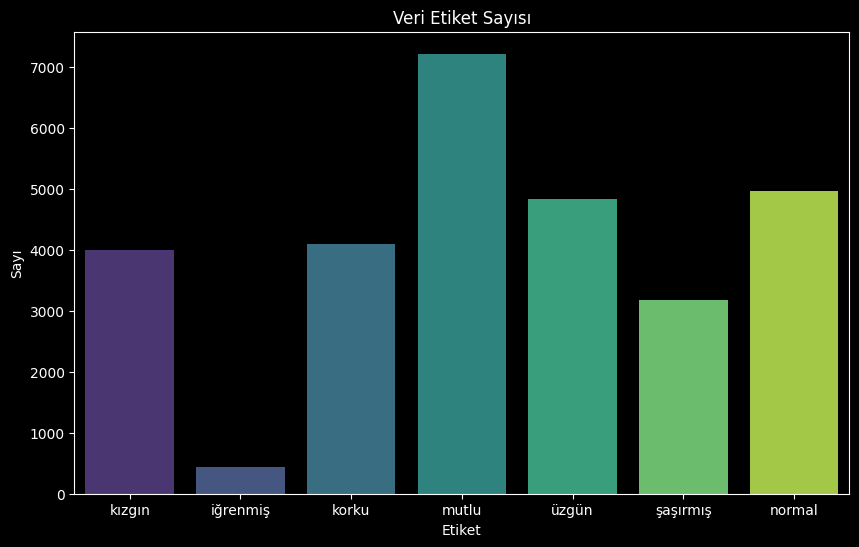

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Etiket sayılarını görselleştirme
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label', palette='viridis')
plt.xlabel('Etiket')
plt.ylabel('Sayı')
plt.title('Veri Etiket Sayısı')
plt.show()


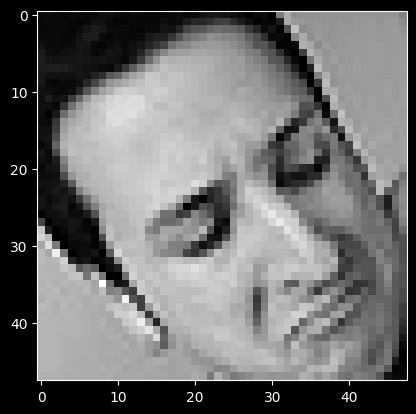

In [32]:
from PIL import Image

# 'train_set' veri yükleyicisinden etiket ve dosya yollarınını frame haline getirelim
train_folder_path = os.path.join(folder_path, "train")
train_file_paths = [os.path.join(train_folder_path, label, file_name) for label in os.listdir(train_folder_path) for file_name in os.listdir(os.path.join(train_folder_path, label))]
train_labels = [label for label in os.listdir(train_folder_path) for _ in os.listdir(os.path.join(train_folder_path, label))]
train = pd.DataFrame({'image_path': train_file_paths, 'label': train_labels})

# Her bir görüntüyü yükleyip gösterme
img = Image.open(train['image_path'][0])
plt.imshow(img, cmap='gray')
plt.show()

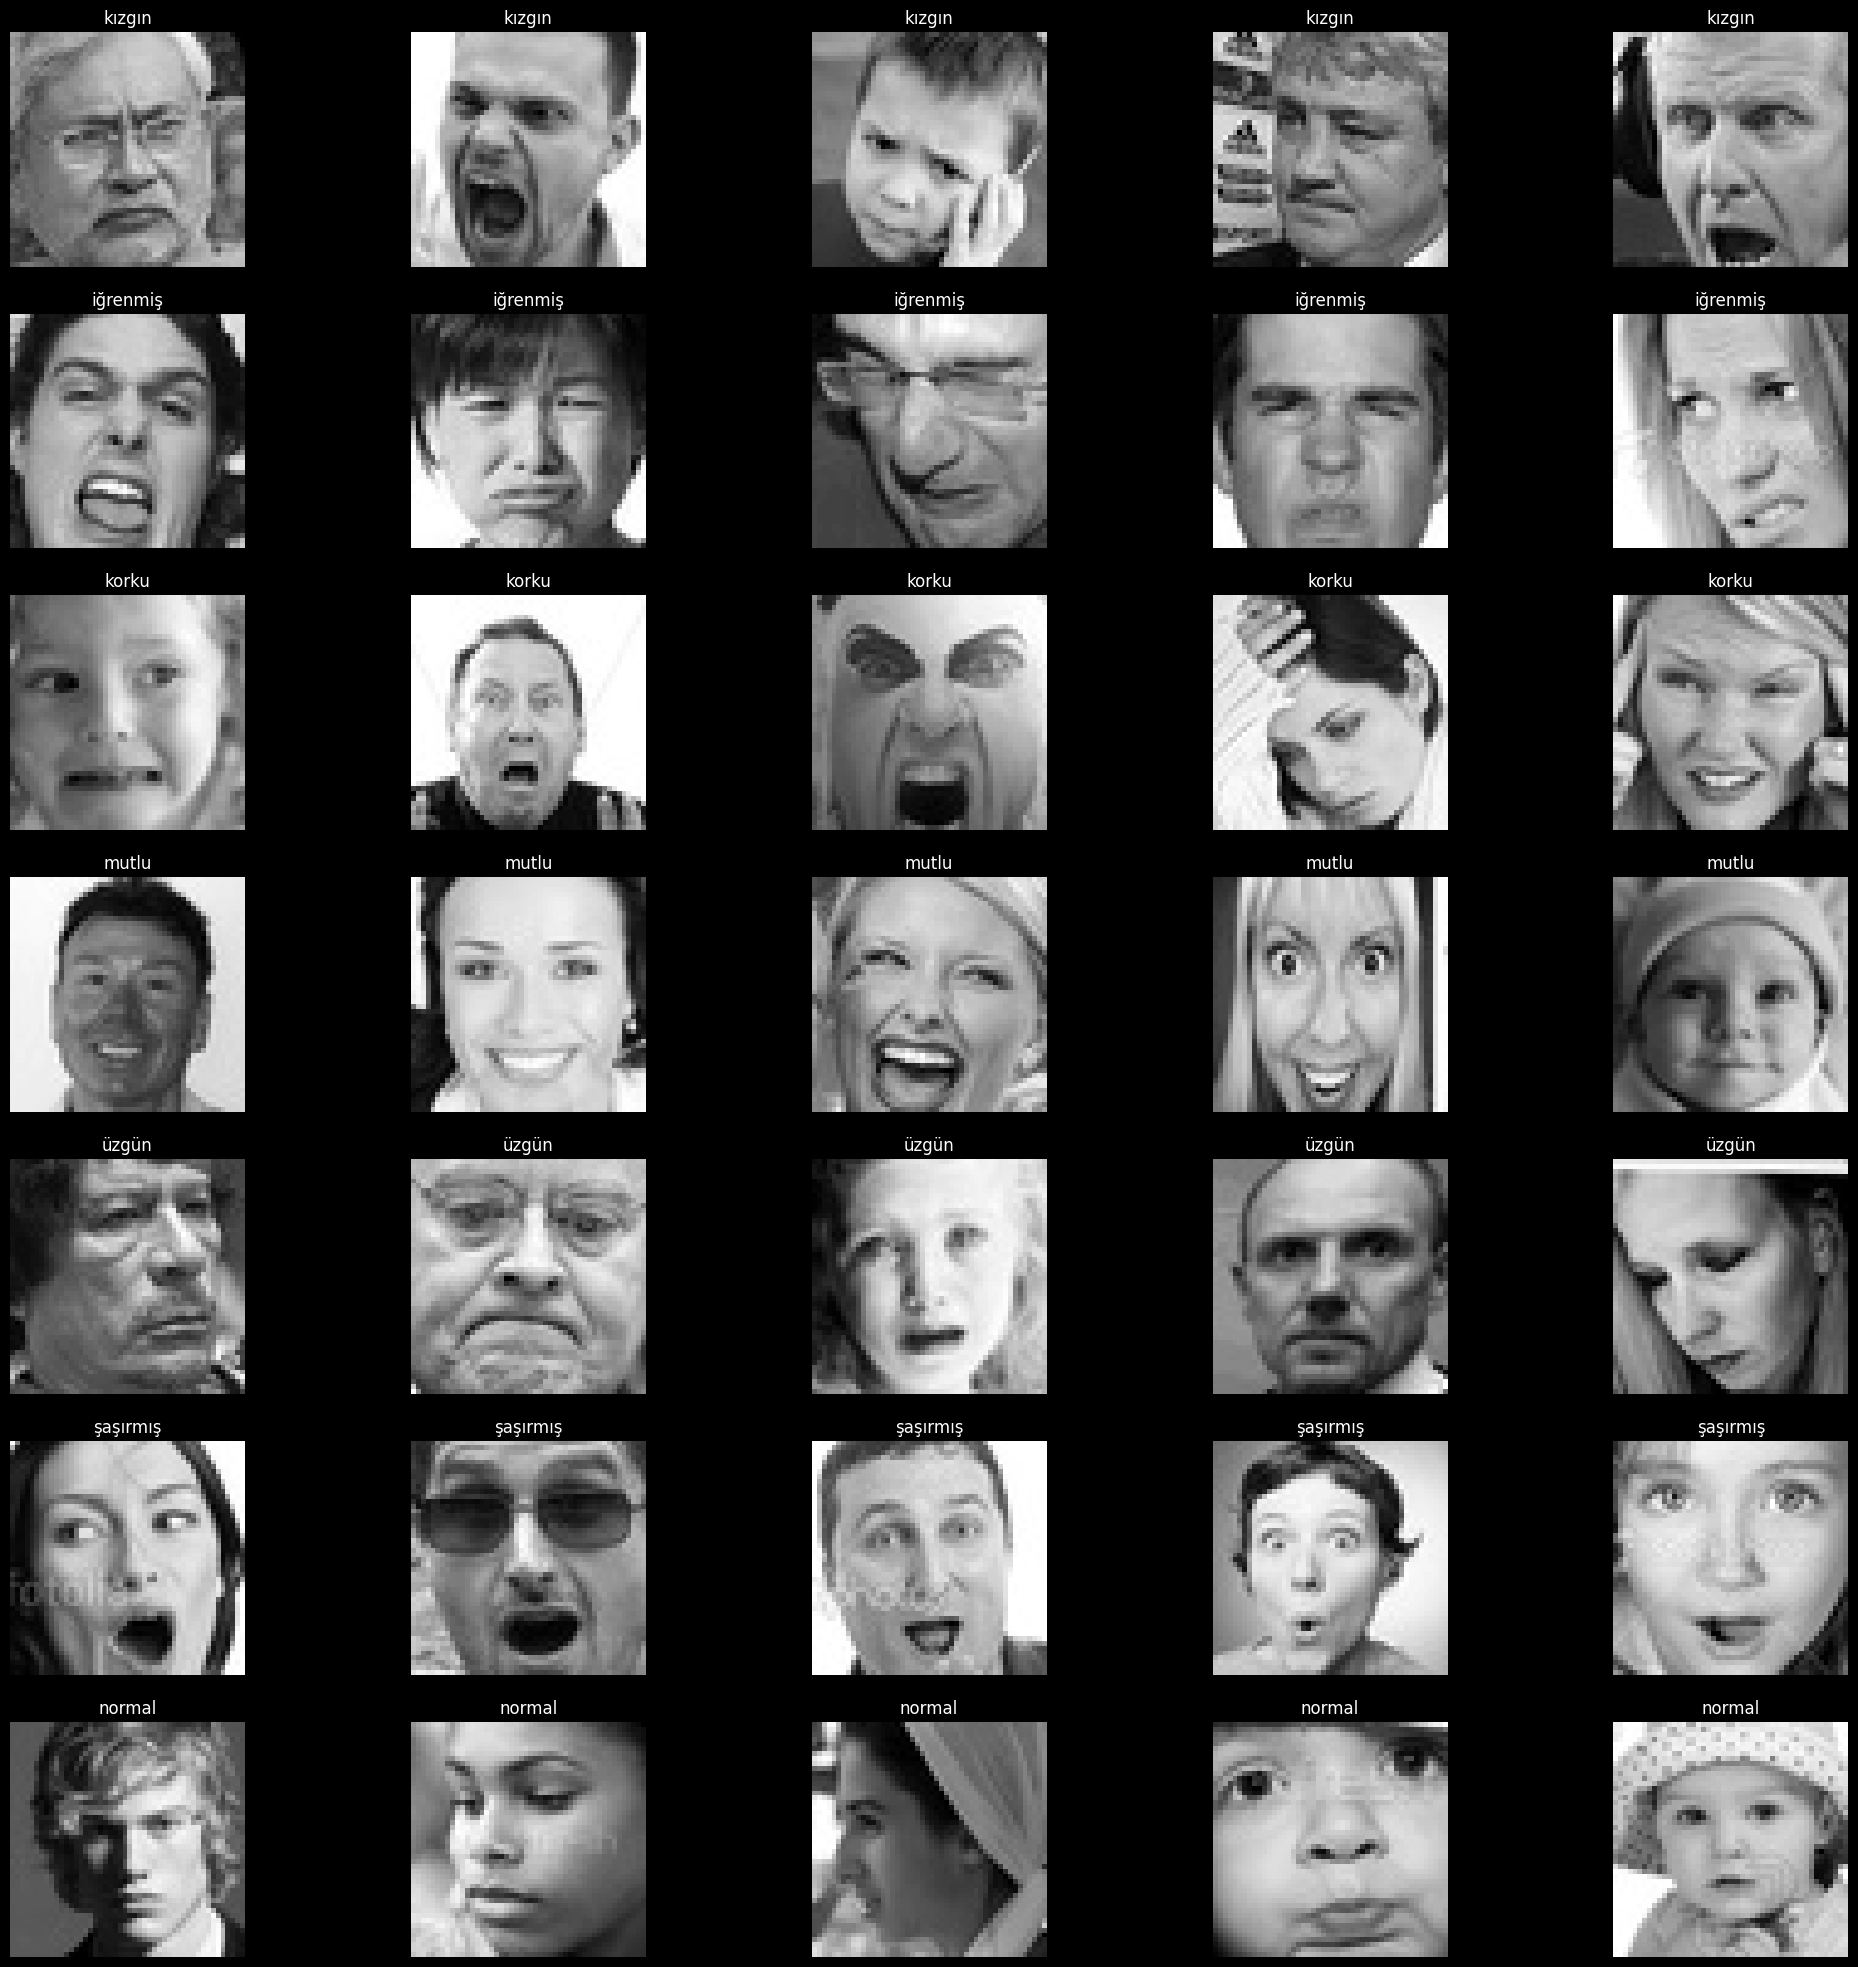

In [31]:
from sklearn.utils import shuffle

plt.figure(figsize=(25, 25))

# Veriyi karıştırma
train = shuffle(train)

# Her bir duygudan rastgele örnekleri gösterme
for i, emotion in enumerate(emotions):
    emotion_files = train[train['label'] == emotion].sample(n=5)['image_path'].values
    
    for j, file_path in enumerate(emotion_files):
        img = Image.open(file_path)
        img = np.array(img)
        
        plt.subplot(7, 5, i * 5 + j + 1)
        plt.imshow(img, cmap='gray')
        plt.title(emotion)
        plt.axis('off')

plt.show()


In [26]:
batch_size = 128
picture_size = 48  

data_train = ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

data_val = ImageDataGenerator(rescale=1./255)

train_set = data_train.flow_from_directory(folder_path + "train",
                                           target_size=(picture_size, picture_size),
                                           color_mode="grayscale",
                                           batch_size=batch_size,
                                           class_mode='categorical',
                                           shuffle=True)

test_set = data_val.flow_from_directory(folder_path + "test",
                                         target_size=(picture_size, picture_size),
                                         color_mode="grayscale",
                                         batch_size=batch_size,
                                         class_mode='categorical',
                                         shuffle=False)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [27]:
number_of_classes = 7

model = Sequential()

# Birinci CNN katmanı
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# İkinci CNN katmanı
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Üçüncü CNN katmanı
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Dördüncü CNN katmanı
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully Connected Birinci Katman
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully Connected İkinci Katman
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(units=number_of_classes, activation='softmax'))

# Optimizasyon olarak Adam optimizer'ı kullanımı
optimization = Adam(learning_rate=0.0001)
model.compile(optimizer=optimization, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_18 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 128)      

In [29]:
# Train Model and Validation data
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 48

 

In [30]:
history = model.fit(
    x=train_set,
    steps_per_epoch=train_set.n // train_set.batch_size,
    epochs=epochs,
    validation_data=test_set,
    validation_steps=test_set.n // test_set.batch_size,
    callbacks=callbacks_list
)


Epoch 1/48
224/224 [==============================] - ETA: 0s - loss: 2.0596 - accuracy: 0.2242
Epoch 1: val_accuracy improved from -inf to 0.17676, saving model to .\model.h5
224/224 [==============================] - 607s 3s/step - loss: 2.0596 - accuracy: 0.2242 - val_loss: 1.8671 - val_accuracy: 0.1768 - lr: 1.0000e-04
Epoch 2/48
224/224 [==============================] - ETA: 0s - loss: 1.8912 - accuracy: 0.2594
Epoch 2: val_accuracy improved from 0.17676 to 0.19894, saving model to .\model.h5
224/224 [==============================] - 679s 3s/step - loss: 1.8912 - accuracy: 0.2594 - val_loss: 1.8924 - val_accuracy: 0.1989 - lr: 1.0000e-04
Epoch 3/48
224/224 [==============================] - ETA: 0s - loss: 1.8133 - accuracy: 0.2935
Epoch 3: val_accuracy improved from 0.19894 to 0.32268, saving model to .\model.h5
224/224 [==============================] - 2205s 10s/step - loss: 1.8133 - accuracy: 0.2935 - val_loss: 1.7325 - val_accuracy: 0.3227 - lr: 1.0000e-04
Epoch 4/48
224/22

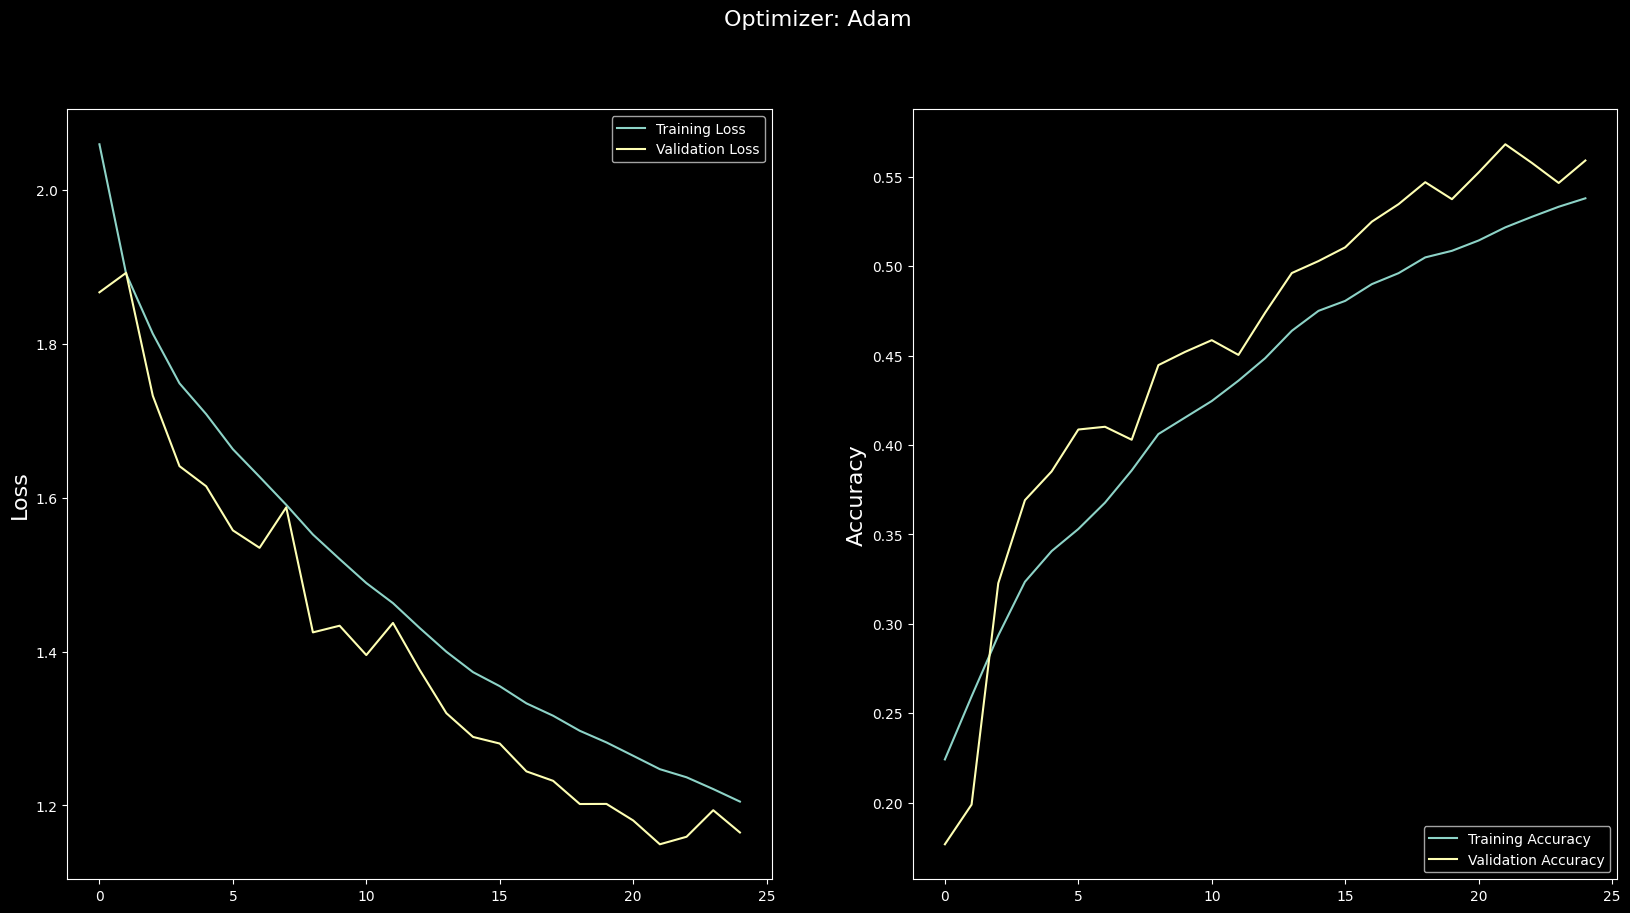

In [31]:
#Plotting Accuracy&Loss

plt.style.use('dark_background')

plt.figure(figsize=(20, 10))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer: Adam', fontsize=16)  # Setting title for the entire figure
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

# Plotting Accuracy
plt.subplot(1, 2, 2)  # Changed from 3 to 2
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()